# Understanding the data / Data preprocessing

In [2]:
# Importing the necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


# Column Meaning:
1) engine_id : Which engine this row belongs 

2) cycle : How many cycles (flights) this engine has flown

3) setting_1, setting_2, setting_3 : Operational settings (altitude, temperature, etc.)

4) s1 to s21 : Sensor readings (engine health parameters) 

In [3]:
columns = ['engine_id', 'cycle', 
           'altitude', 'mach_number', 'sea_level_temp', 
           'T2', 'T24', 'T30', 'T50', 'P2', 'P15', 'P30', 
           'Nf', 'Nc', 'epr', 'Ps30', 'phi', 'NRf', 'NRe', 
           'BPR', 'farB', 'htBleed', 'Nf_dmd', 'PCNfR_dmd', 'W31', 'W32']



# Loading Train and Test Data for two mode fan degradation (HPC and Turbo-fan)

In [4]:
df004_train = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\train_FD004.txt', sep='\s+', header=None)
df004_test = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\test_FD004.txt', sep='\s+', header=None)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\elroy\AppData\Local\Temp\ipykernel_25800\3257384835.py:1: SyntaxWarning: invalid escape sequence '\s'
  df004_train = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\train_FD004.txt', sep='\s+', header=None)
C:\Users\elroy\AppData\Local\Temp\ipykernel_25800\3257384835.py:2: SyntaxWarning: invalid escape sequence '\s'
  df004_test = pd.read_csv(r'C:\Users\elroy\OneDrive\Desktop\JetEngineFailureClassification\test_FD004.txt', sep='\s+', header=None)


In [5]:
# Renaming columns names for FD004
df004_train.columns = columns
df004_test.columns = columns

In [6]:
df004_train

,engine_id,cycle,altitude,mach_number,sea_level_temp,T2,T24,T30,T50,P2,...,phi,NRf,NRe,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,42.0049,0.8400,100.0,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100.0,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100.0,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100.0,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60.0,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100.0,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100.0,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100.0,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100.0,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774


In [ ]:
df004_test

In [7]:
# Each engine has a different lifetime 
# so we find the maximum cycle of each engine separately 
# then at each cycle subtract to know how much life is left
# 1. Calculate max engine cycle for each engine: 
max_cycle_fd004 = df004_train.groupby('engine_id')['cycle'].max()

# 2. Merge max cycle info back into the Dataset: 
df004_train = df004_train.merge(max_cycle_fd004.to_frame('max_cycle'), on='engine_id', how='left')

# 3. Calculate RUL (Remaining useful cycles: Max cycle - cycle)
df004_train['RUL'] = df004_train['max_cycle'] - df004_train['cycle']
df004_train.drop('max_cycle', axis=1, inplace=True)



# Data Cleaning 

In [8]:
print(df004_train.isnull().sum())

engine_id         0
cycle             0
altitude          0
mach_number       0
sea_level_temp    0
T2                0
T24               0
T30               0
T50               0
P2                0
P15               0
P30               0
Nf                0
Nc                0
epr               0
Ps30              0
phi               0
NRf               0
NRe               0
BPR               0
farB              0
htBleed           0
Nf_dmd            0
PCNfR_dmd         0
W31               0
W32               0
RUL               0
dtype: int64


In [9]:
# Check for duplicates in df004_train
print("Duplicate rows in df004_train:", df004_train.duplicated().sum())


Duplicate rows in df004_train: 0


In [10]:
df004_train['RUL'].describe().T

count    61249.000000
mean       133.311417
std         89.783389
min          0.000000
25%         61.000000
50%        122.000000
75%        190.000000
max        542.000000
Name: RUL, dtype: float64

# Lets visualize the data 

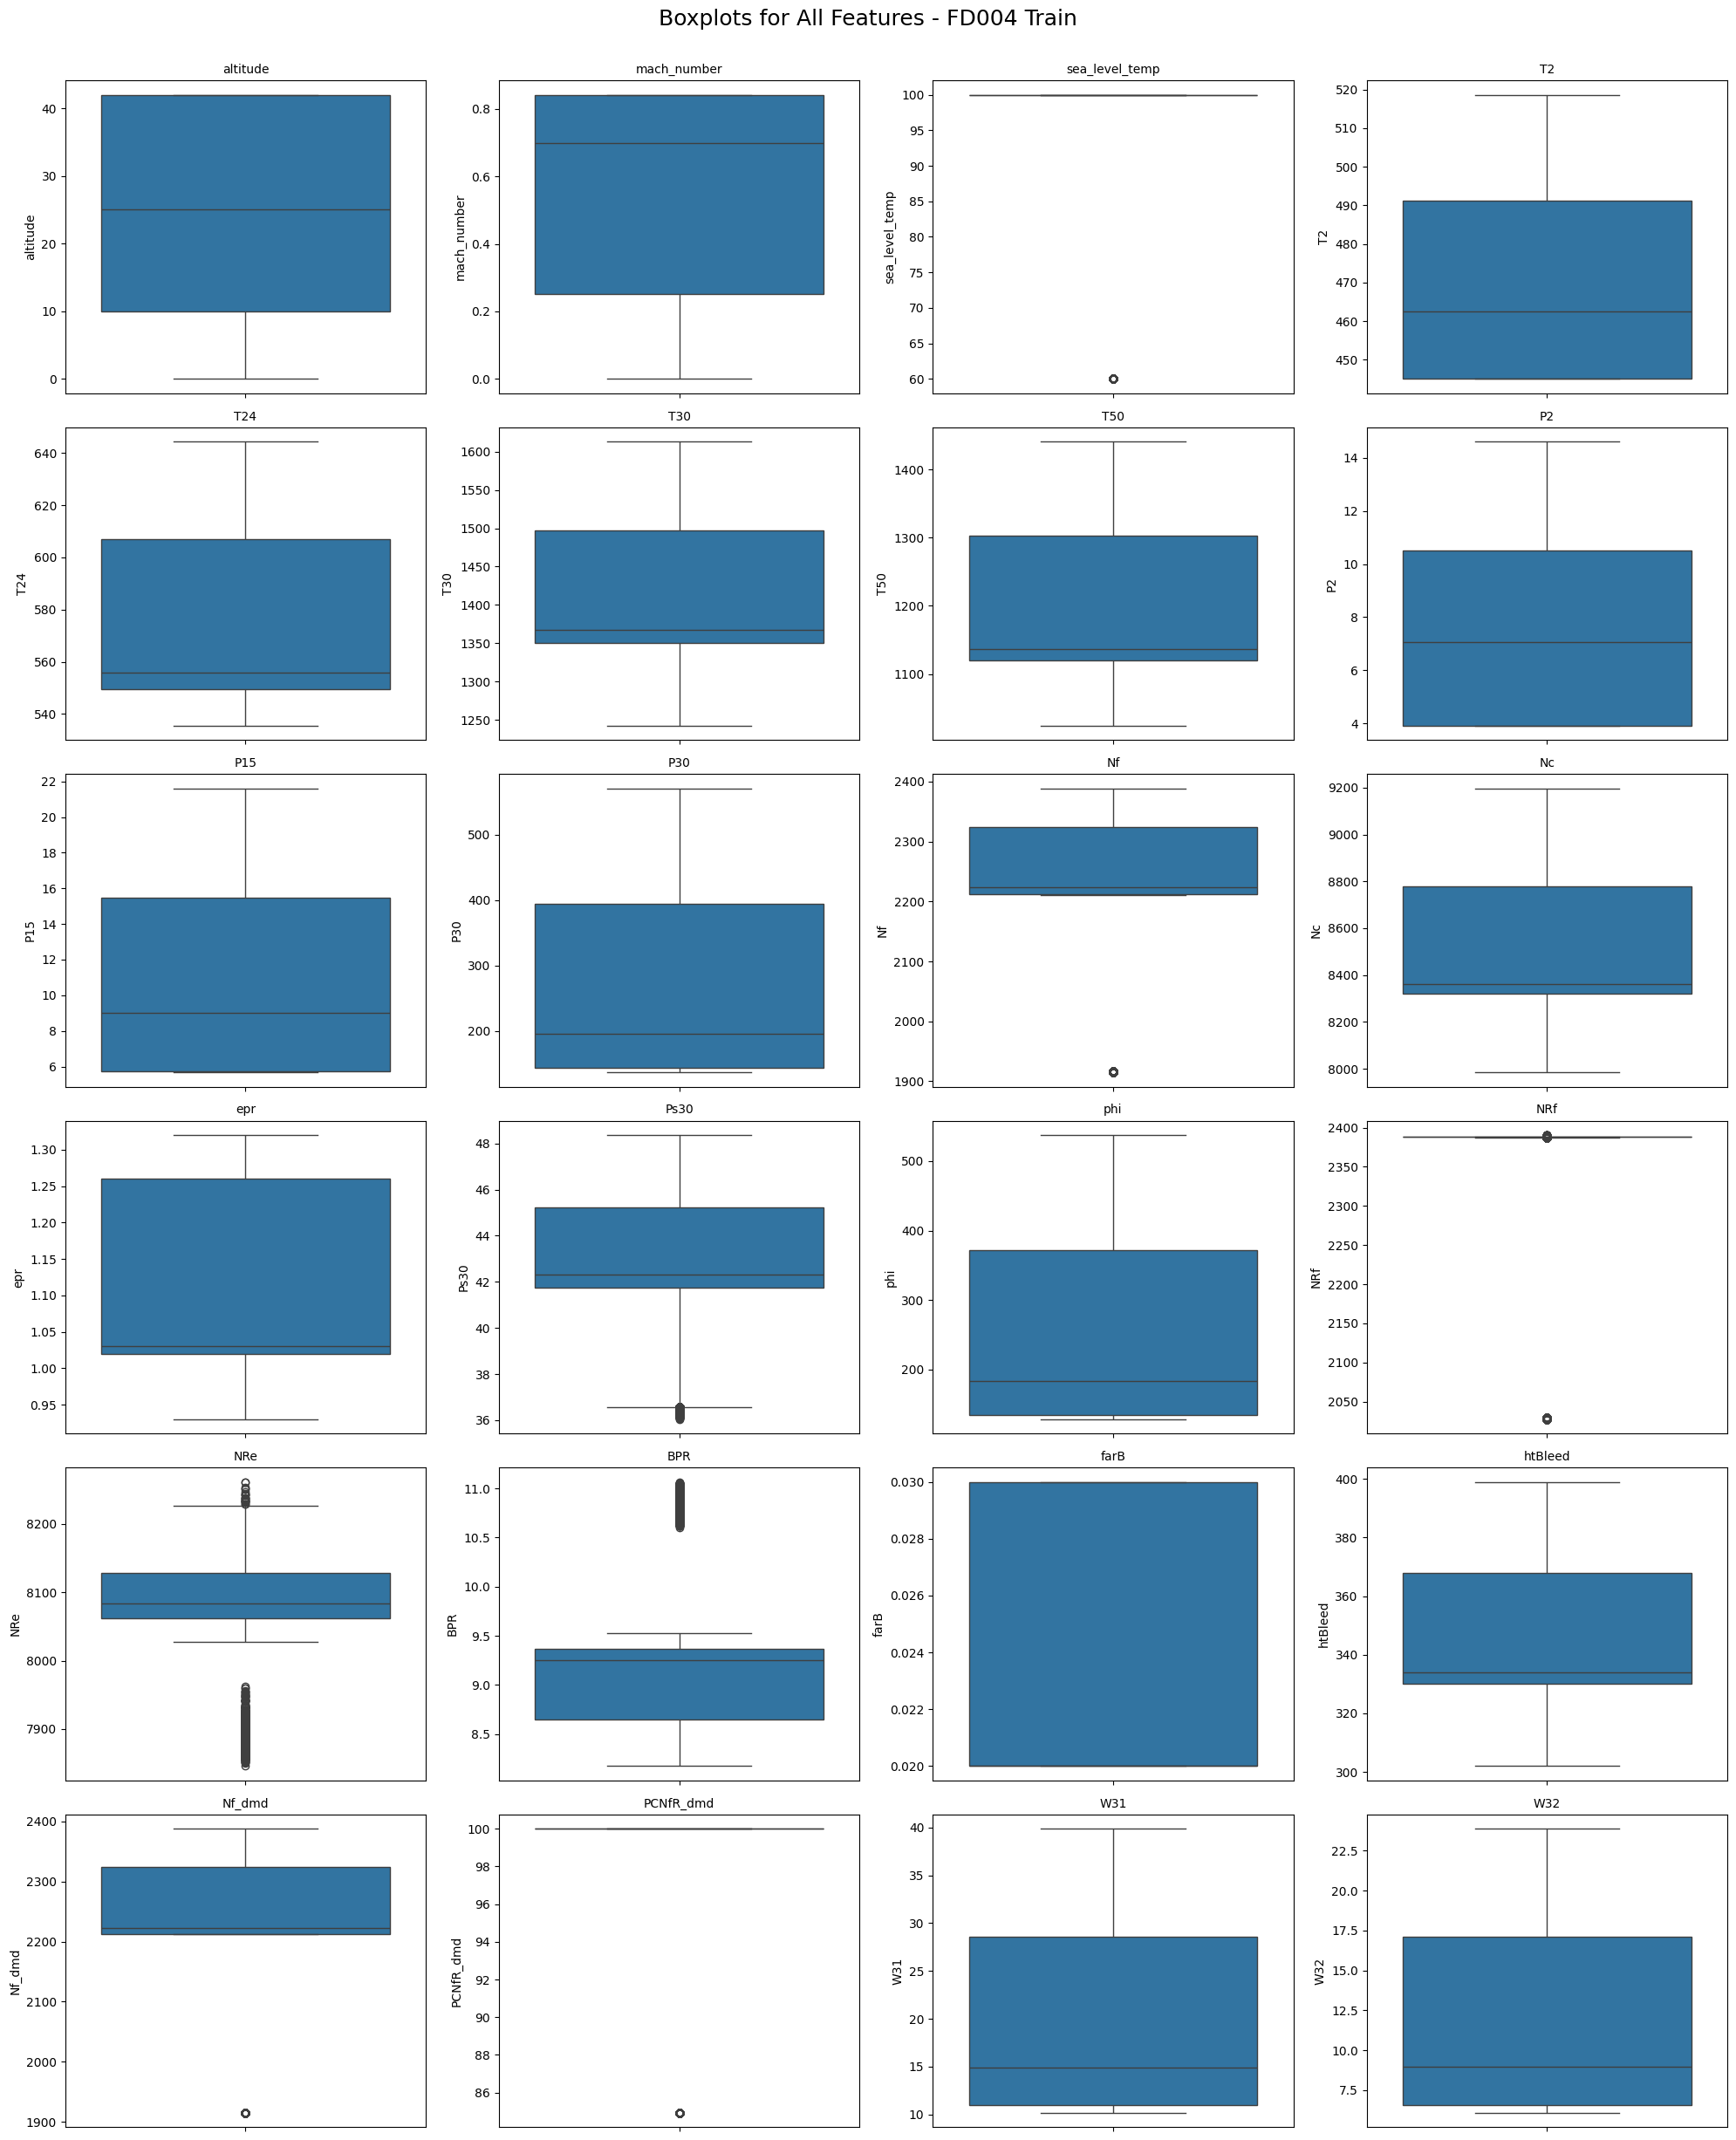

In [11]:
# Boxplots- to see sensor value ranges and we can detect extreme values for FD004
feature_cols2 = df004_train.columns.drop(['engine_id', 'cycle', 'RUL'])
n_features = len(feature_cols2)

# Create subplots
rows = 6
cols = 4
fig, axes = plt.subplots(rows, cols, figsize=(20, 24))
axes = axes.flatten()
for idx, col in enumerate(feature_cols2):
    sns.boxplot(data=df004_train, y=col, ax=axes[idx])
    axes[idx].set_title(col, fontsize=10)
    axes[idx].set_xlabel('') 
for j in range(idx + 1, rows * cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle('Boxplots for All Features - FD004 Train', fontsize=18, y=1.02)
plt.show()


In [ ]:
# NO OUTLIERS

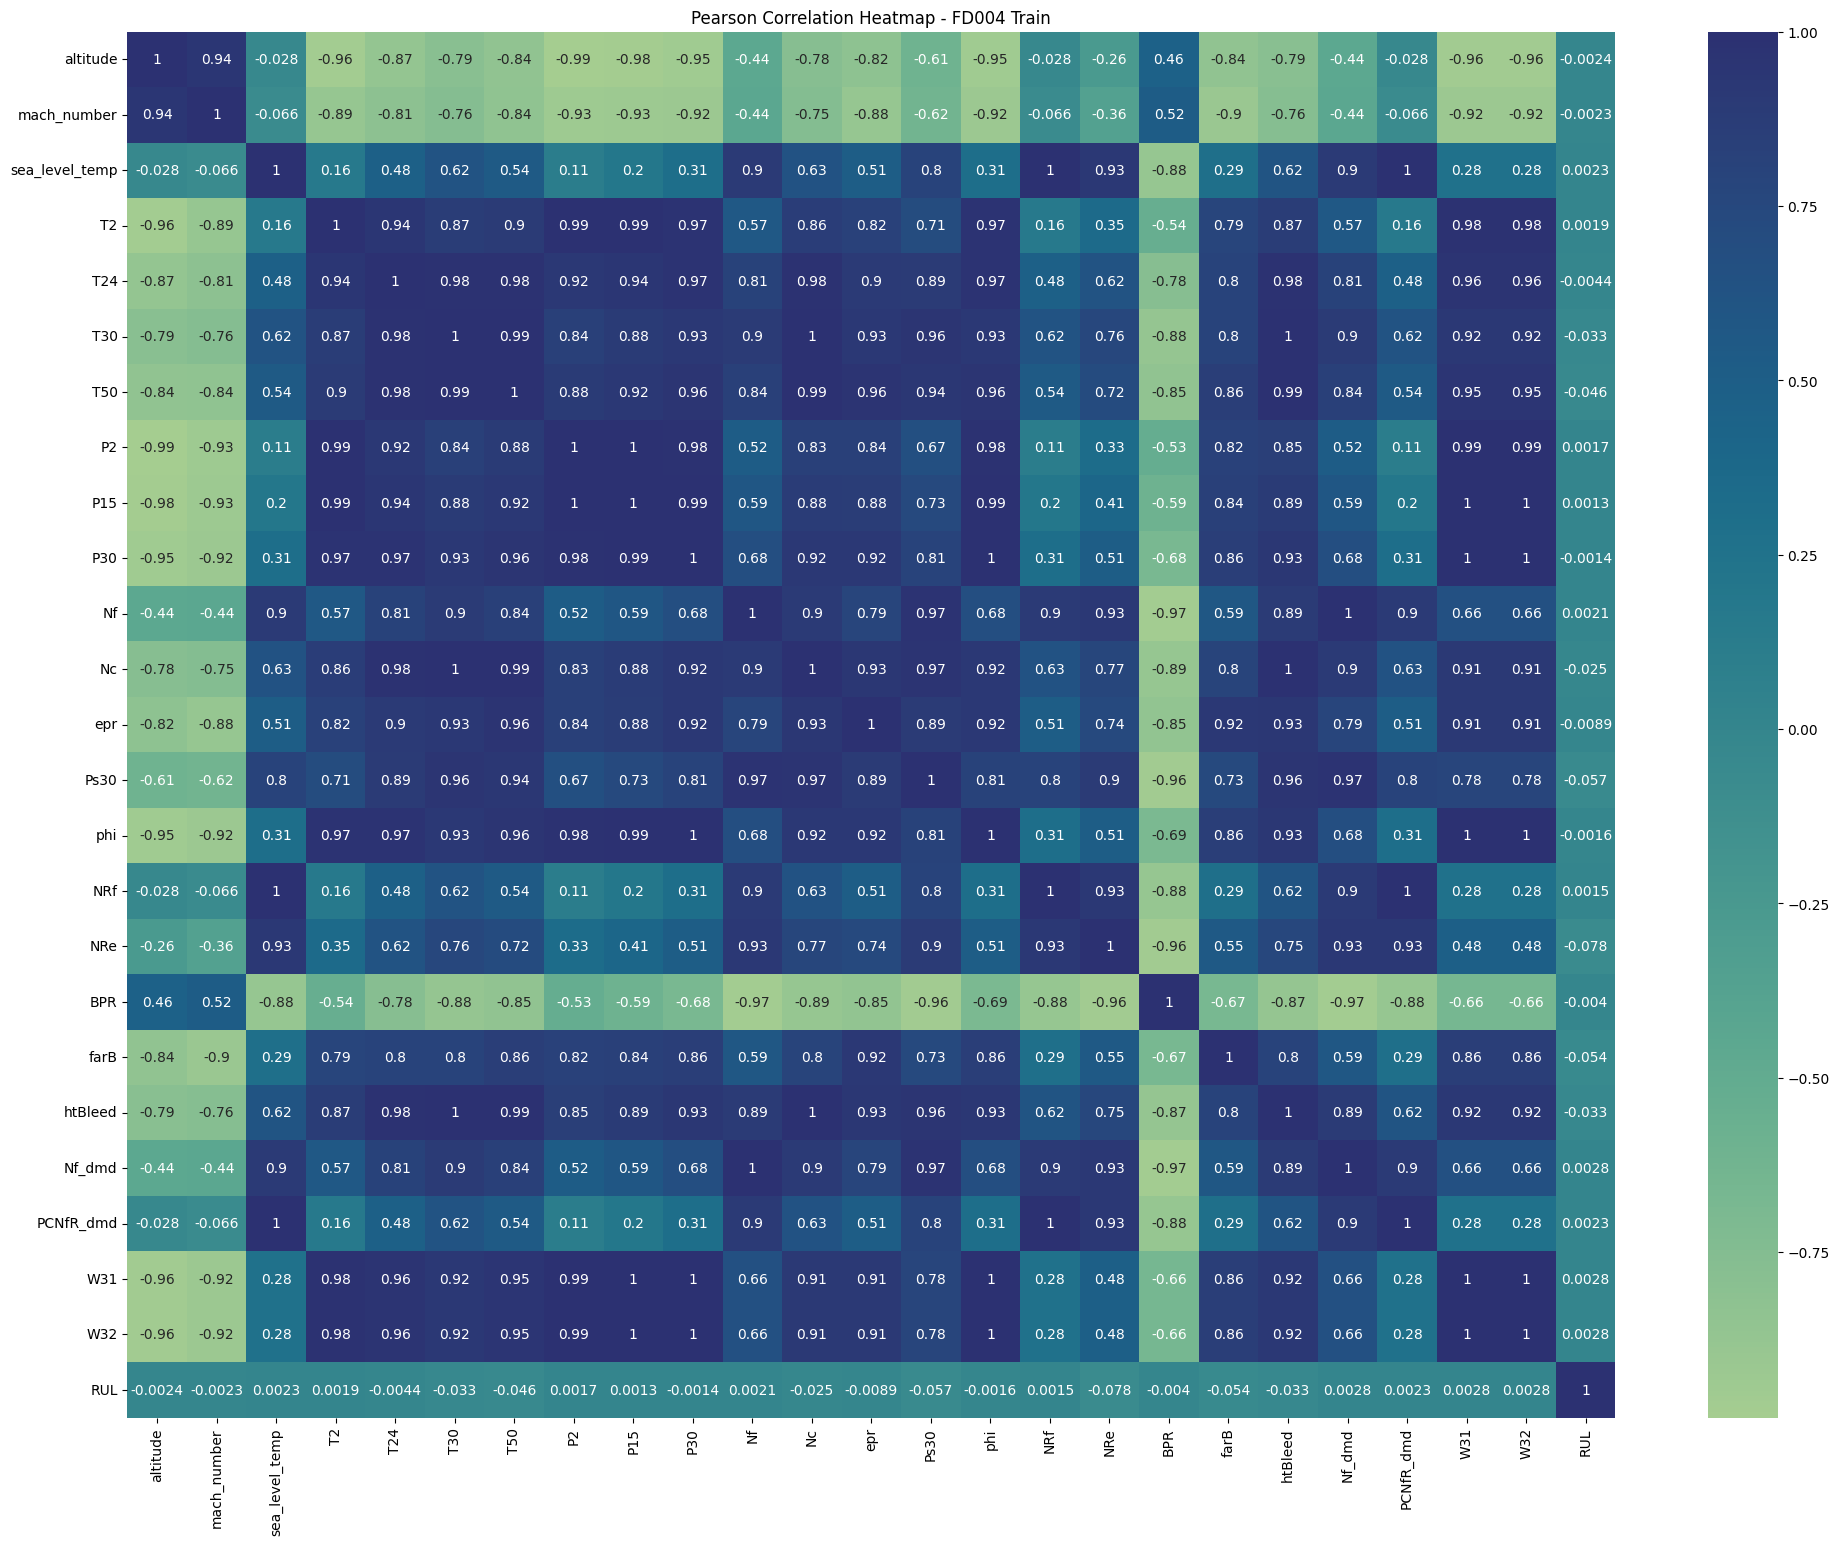

In [ ]:
# Correlation heatmap for FD004
feature_cols_fd004 = df004_train.columns.drop(['engine_id', 'cycle'])
corr_fd004 = df004_train[feature_cols_fd004].corr(method='pearson')
plt.figure(figsize=(24,18))
sns.heatmap(corr_fd004, cmap='crest', annot= True)
plt.title('Pearson Correlation Heatmap - FD004 Train')
plt.show()

# RUL (Target) seems to have non linear interactions with sensor values


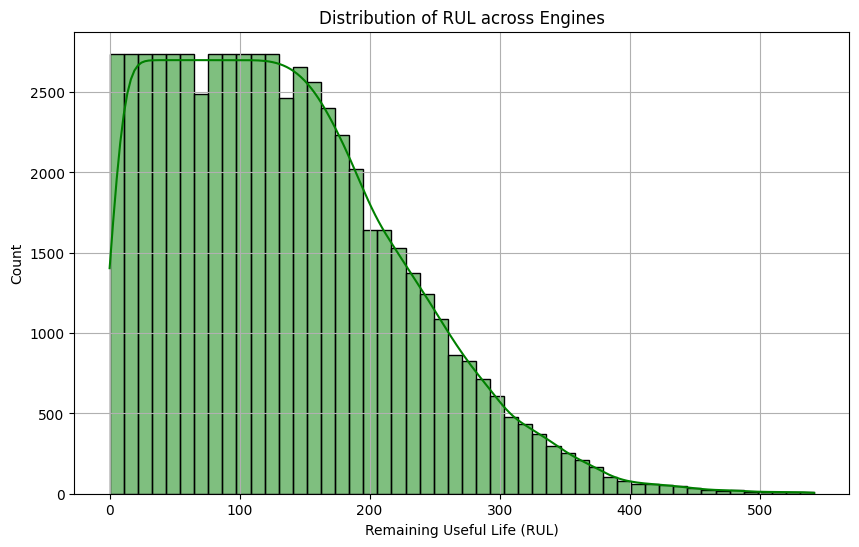

In [12]:
# KDE plot for RUL
plt.figure(figsize=(10,6))
sns.histplot(df004_train['RUL'], bins=50, kde=True, color='green')
plt.xlabel('Remaining Useful Life (RUL)')
plt.title('Distribution of RUL across Engines')
plt.grid(True)
plt.show()



# Feature Engineering / selection

In [13]:
# Create the 3-class distribution in health_stage_code (BASED ON DOMAIN KNOWLEGE AND AERO-MECH RESEARCH)
# --THRESHOLDS CAN BE SUBJECTIVE--
# BUT these thresholds can also be acceptable in the project to avoid-- EXTREME CLASS IMBALANCE
df004_train['health_stage_code'] = np.where(
    df004_train['RUL'] < 25, 2,
    np.where(df004_train['RUL'] < 50, 1, 0))

# Creating the Target variabe using RUL thresholds

In [14]:
df004_train['health_stage_code'].value_counts()

health_stage_code
0    48799
1     6225
2     6225
Name: count, dtype: int64

In [15]:
#SMOTE
from imblearn.over_sampling import SMOTE
X = df004_train.drop(columns=["health_stage_code"])
y = df004_train["health_stage_code"]
smote = SMOTE(random_state=42, sampling_strategy={1: 48799, 2: 48799})
X_resampled, y_resampled = smote.fit_resample(X, y)
df004_resampled = X_resampled.assign(health_stage_code=y_resampled)

In [16]:
df004_resampled['health_stage_code'].value_counts()

health_stage_code
0    48799
1    48799
2    48799
Name: count, dtype: int64

In [17]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import RFE
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = df004_resampled.drop(columns=["health_stage_code", "engine_id", "RUL"])
y = df004_resampled["health_stage_code"]

lgbm = LGBMClassifier(random_state=42)
rfe = RFE(estimator=lgbm, n_features_to_select=15)
scaler = StandardScaler()

pipeline_lgbm = Pipeline([
    ('scaler', scaler),
    ('rfe', rfe),
    ('clf', lgbm),
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(pipeline_lgbm, X, y, cv=cv, scoring='accuracy')
print(scores.mean())

pipeline_lgbm.fit(X, y)

feature_mask = pipeline_lgbm.named_steps['rfe'].get_support()
top_features = X.columns[feature_mask]


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016035 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4920
[LightGBM] [Info] Number of data points in the train set: 117117, number of used features: 25
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013703 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4917
[LightGBM] [Info] Number of data points in the train set: 117117, number of used features: 24
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013366 s

In [18]:
print(scores.mean())

0.9182565193408729


In [19]:
# confusion matrix for RFE 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.35, random_state=42)
pipeline_lgbm.fit(X_train, y_train)
y_pred = pipeline_lgbm.predict(X_test)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.014003 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4923
[LightGBM] [Info] Number of data points in the train set: 95158, number of used features: 25
[LightGBM] [Info] Start training from score -1.098591
[LightGBM] [Info] Start training from score -1.098623
[LightGBM] [Info] Start training from score -1.098623
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010915 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4920
[LightGBM] [Info] Number of data points in the train set: 95158, number of used features: 24
[LightGBM] [Info] Start training from score -1.098591
[LightGBM] [Info] Start training from score -1.098623
[LightGBM] [Info] Start training from score -1.098623
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007911 sec

In [20]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94     17079
           1       0.86      0.90      0.88     17080
           2       0.93      0.93      0.93     17080

    accuracy                           0.92     51239
   macro avg       0.92      0.92      0.92     51239
weighted avg       0.92      0.92      0.92     51239

[[15719  1297    63]
 [  598 15430  1052]
 [    0  1272 15808]]


In [21]:
# TOP FEATURES
print("Top selected features:")
print(top_features.tolist())

Top selected features:
['cycle', 'mach_number', 'T24', 'T30', 'T50', 'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRe', 'BPR', 'htBleed']


In [ ]:
# Subset only the selected features (+)  target (HSC)
# FILTER METHOD (PEARSON CORRELATION)
selected_features = ['cycle', 'mach_number', 'T24', 'T30', 'T50', 'P15', 'P30', 'Nf', 'Nc', 'Ps30', 'phi', 'NRf', 'NRe', 'BPR', 'htBleed','health_stage_code']


df004_resampled = df004_resampled[selected_features]
df004_resampled.corr()

In [62]:
# PCA (PRINICIPAL COMPONENT ANALYSIS)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df004_resampled.drop(columns=["health_stage_code"])
y = df004_resampled["health_stage_code"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=10)  # Retain 10 principal components
X_pca = pca.fit_transform(X_scaled)
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Explained Variance Ratio: [7.82822359e-01 1.34055626e-01 7.20489038e-02 7.31751837e-03
 2.04563275e-03 9.87666620e-04 4.69004723e-04 8.52281234e-05
 8.20751169e-05 6.62818780e-05]


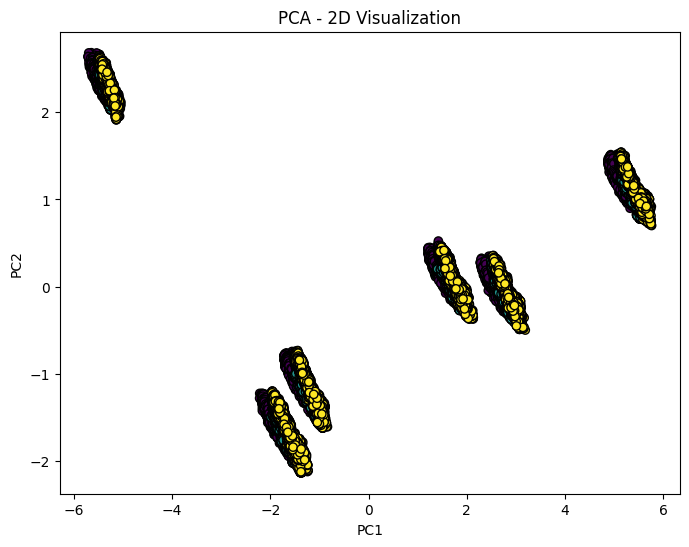

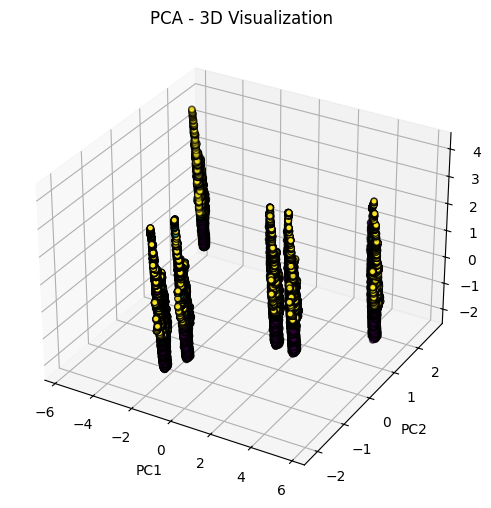

In [63]:
#VISUALIZATION 3D
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA - 2D Visualization')
plt.show()

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title('PCA - 3D Visualization')
plt.show()

In [67]:
feature_names = X.columns
components = pd.DataFrame(pca.components_, columns=feature_names)

# Top contributing features for the first three principal components
top_features_per_pc = {}
for i in range(5):  # First 3 components
    top_features = components.iloc[i].abs().sort_values(ascending=False).head(5).index.tolist()
    top_features_per_pc[f'PC{i+1}'] = top_features

# Display the top features for each principal component
for pc, features in top_features_per_pc.items():
    print(f"{pc}: {features}")

PC1: ['Nc', 'T30', 'htBleed', 'T50', 'Ps30']
PC2: ['NRf', 'NRe', 'P15', 'P30', 'phi']
PC3: ['cycle', 'NRf', 'Nf', 'NRe', 'P15']
PC4: ['NRe', 'BPR', 'Nf', 'T24', 'NRf']
PC5: ['BPR', 'NRe', 'NRf', 'T50', 'P30']


In [23]:
# Observation from variance ratio PC1, PC2, PC3 showed highest variance
important_features = ['Nc', 'T30', 'htBleed', 'T50', 'Ps30', 
                      'NRf', 'NRe', 'P15', 'P30', 'phi', 
                      'cycle', 'Nf']

df004_resampled = df004_resampled[important_features + ['health_stage_code']]
df004_resampled

,Nc,T30,htBleed,T50,Ps30,NRf,NRe,P15,P30,phi,cycle,Nf,health_stage_code
0,8311.320000,1343.430000,330,1112.930000,41.690000,2387.990000,8074.830000,5.700000,137.360000,129.780000,1,2211.860000,0
1,8713.600000,1477.610000,361,1237.500000,43.940000,2387.730000,8046.130000,13.610000,332.100000,312.590000,2,2323.660000,0
2,8306.690000,1343.120000,329,1117.050000,41.660000,2387.970000,8066.620000,5.690000,138.180000,129.620000,3,2211.920000,0
3,8312.350000,1341.240000,328,1118.030000,41.680000,2388.020000,8076.050000,5.700000,137.980000,129.800000,4,2211.880000,0
4,7994.940000,1255.230000,305,1033.590000,36.480000,2028.080000,7865.800000,9.000000,174.820000,164.110000,5,1915.220000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
146392,9118.784296,1600.267080,395,1423.878491,48.219899,2388.487315,8188.286912,21.574195,567.466040,535.089061,287,2388.485805,2
146393,8372.873160,1360.449569,332,1132.863930,42.314911,2388.833559,8131.475791,5.720000,138.568969,130.483094,163,2212.702206,2
146394,8026.279352,1272.243717,309,1066.538712,37.315756,2028.417589,7885.322583,9.030000,175.029516,163.946560,196,1915.504598,2
146395,8828.207513,1512.711648,371,1322.117963,45.907835,2388.730412,8177.980771,15.490000,403.729483,380.449176,272,2319.530412,2


In [52]:
# DROP MACH_NO
df004_resampled= df004_resampled.drop(columns= ["mach_number"])


In [24]:
# Prepare out data for model training and testing
# We will use the 75% of the data for training and validation and 25% for holdout testing 
# We will Kfold stratified cross validation for model training and validation 
from sklearn.model_selection import train_test_split
X = df004_resampled.drop(columns=["health_stage_code"])
y = df004_resampled["health_stage_code"]
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.30, stratify=y, random_state=42)

#**LIGHTGBM classifier (BOOSTING )

In [ ]:
pipe_LightGBM = Pipeline([
    ('scaler', StandardScaler()),
    ('lgbm', LGBMClassifier(random_state=42))
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = cross_val_score(pipe_LightGBM, X_train, y_train, cv=cv, scoring='accuracy')

print("Mean Accuracy:", scores.mean())
pipe_LightGBM.fit(X_train, y_train)

In [26]:
print("Mean Accuracy:", scores.mean()) # for LightGBM

Mean Accuracy: 0.911277652546425


In [27]:
# TEST THE LIGHTGBM Model on the holdout data
y_pred_LightGBM = pipe_LightGBM.predict(X_holdout) 
print(classification_report(y_holdout, y_pred_LightGBM))
print(confusion_matrix(y_holdout, y_pred_LightGBM))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94     14640
           1       0.85      0.90      0.87     14640
           2       0.93      0.93      0.93     14640

    accuracy                           0.91     43920
   macro avg       0.91      0.91      0.91     43920
weighted avg       0.91      0.91      0.91     43920

[[13378  1212    50]
 [  518 13130   992]
 [    0  1092 13548]]


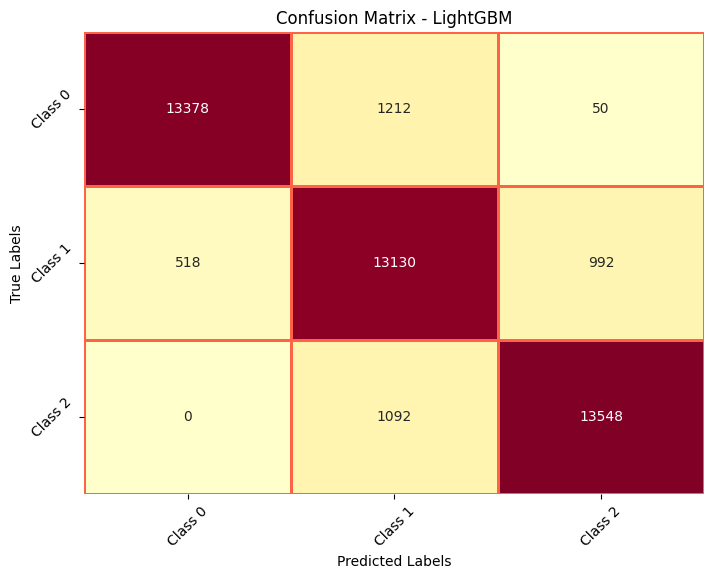

In [79]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_LightGBM = pipe_LightGBM.predict(X_holdout)
cm = confusion_matrix(y_holdout, y_pred_LightGBM)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlOrRd", cbar=False, linewidths=1, linecolor='tomato')
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Class 0", "Class 1", "Class 2"], rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Class 0", "Class 1", "Class 2"], rotation=45)
plt.show()

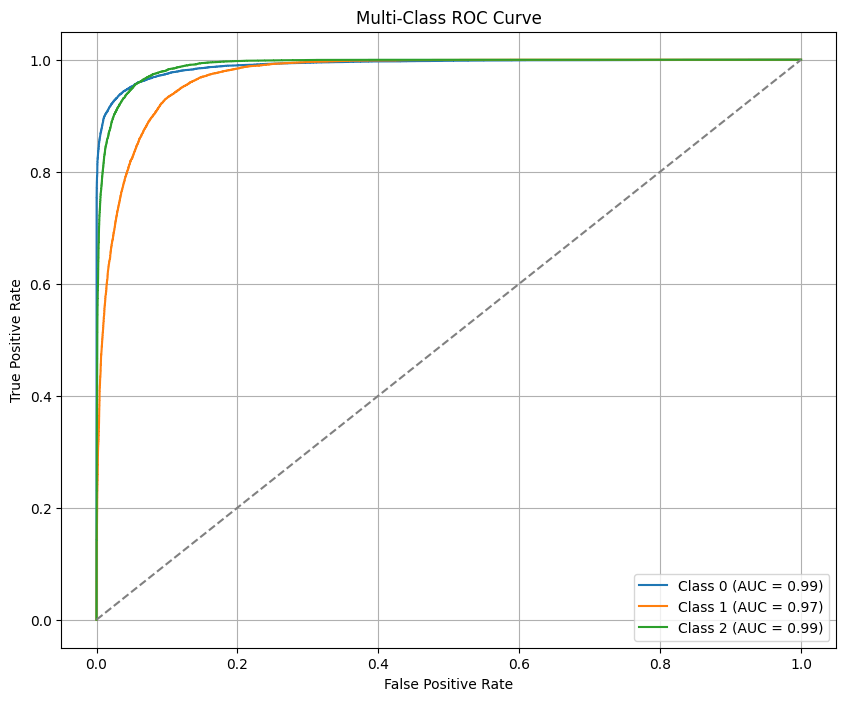

In [77]:
# ROC CURVE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
y_probs = pipe_LightGBM.predict_proba(X_holdout)  # Get predicted probabilities
n_classes = y_probs.shape[1]
# Binarize the labels for multi-class ROC
y_holdout_binarized = label_binarize(y_holdout, classes=np.unique(y_holdout))

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_holdout_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title("Multi-Class ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.show()

#** GRADIENT BOOSTING

In [28]:
from sklearn.ensemble import GradientBoostingClassifier  # gradient boosting classifiera
pipe_grad_boost = Pipeline([
    ('scaler', StandardScaler()),
    ('grad_boost', GradientBoostingClassifier(random_state=42))
])

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = cross_val_score(pipe_grad_boost, X_train, y_train, cv=cv, scoring='accuracy')

print("Mean Accuracy:", scores.mean())
pipe_grad_boost.fit(X_train, y_train)

Mean Accuracy: 0.8638035851947267


Pipeline(steps=[('scaler', StandardScaler()),
                ('grad_boost', GradientBoostingClassifier(random_state=42))])

In [29]:
# CLASSIFICATION  REPORT
# TEST THE GRADIENT BOOSTING Model on the holdout data
y_pred_grad= pipe_grad_boost.predict(X_holdout) 
print(classification_report(y_holdout, y_pred_grad))
print(confusion_matrix(y_holdout, y_pred_grad))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90     14640
           1       0.77      0.83      0.80     14640
           2       0.89      0.88      0.89     14640

    accuracy                           0.86     43920
   macro avg       0.87      0.86      0.86     43920
weighted avg       0.87      0.86      0.86     43920

[[12741  1836    63]
 [  938 12175  1527]
 [    2  1708 12930]]


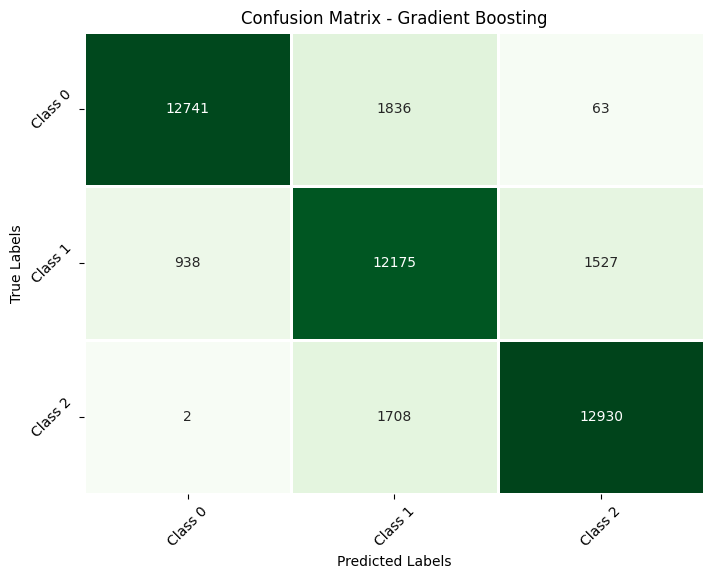

In [ ]:
y_pred_grad_boost = pipe_grad_boost.predict(X_holdout)
cm = confusion_matrix(y_holdout, y_pred_grad_boost)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", cbar=False, linewidths=1)
plt.title("Confusion Matrix - Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Class 0", "Class 1", "Class 2"], rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Class 0", "Class 1", "Class 2"], rotation=45)
plt.show()

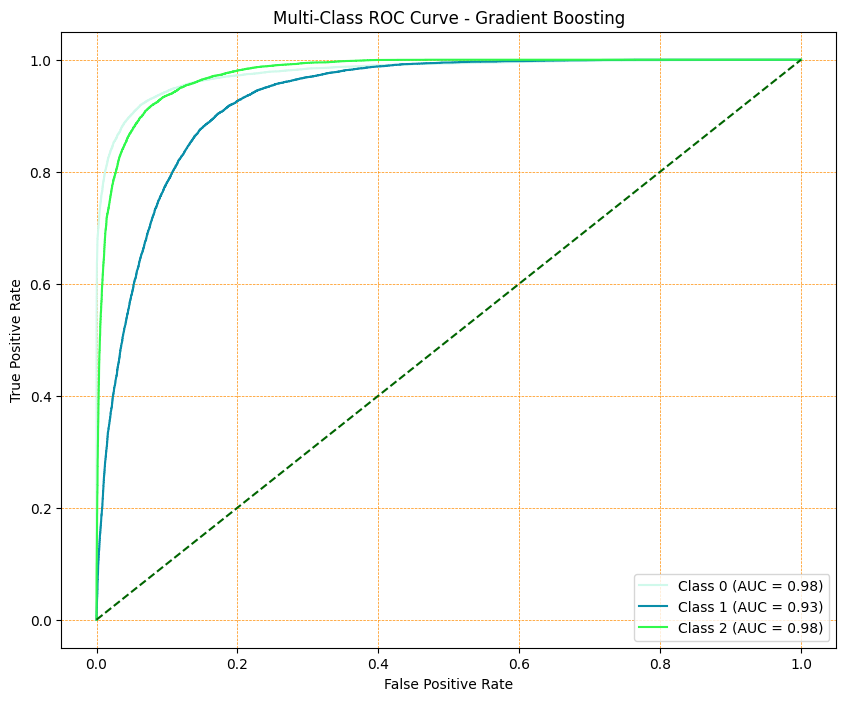

In [34]:
# ROC CURVE FOR GRADIENT BOOSTING
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
y_probs = pipe_grad_boost.predict_proba(X_holdout)  # Get predicted probabilities
n_classes = y_probs.shape[1]
y_holdout_binarized = label_binarize(y_holdout, classes=np.unique(y_holdout))
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_holdout_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})", color=np.random.rand(3,))  
plt.plot([0, 1], [0, 1], color='darkgreen', linestyle='--')
plt.title("Multi-Class ROC Curve - Gradient Boosting")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(color='darkorange', linestyle='--', linewidth=0.5)
plt.show()

# EXTRATREES

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
pipe_extratrees = Pipeline([
    ('scaler', StandardScaler()),
    ('extratrees', ExtraTreesClassifier(random_state=42))
])
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
scores = cross_val_score(pipe_extratrees, X_train, y_train, cv=cv, scoring='accuracy')
print("Mean Accuracy:", scores.mean())
pipe_extratrees.fit(X_train, y_train)

Mean Accuracy: 0.9531211881690527


Pipeline(steps=[('scaler', StandardScaler()),
                ('extratrees', ExtraTreesClassifier(random_state=42))])

In [36]:
# extraTrees on Holdout
# CLASSIFICATION  REPORT
# TEST THE GRADIENT BOOSTING Model on the holdout data
y_pred_extra= pipe_extratrees.predict(X_holdout) 
print(classification_report(y_holdout, y_pred_extra))
print(confusion_matrix(y_holdout, y_pred_extra))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96     14640
           1       0.92      0.97      0.95     14640
           2       0.98      0.98      0.98     14640

    accuracy                           0.96     43920
   macro avg       0.96      0.96      0.96     43920
weighted avg       0.96      0.96      0.96     43920

[[13647   944    49]
 [  162 14254   224]
 [    0   223 14417]]


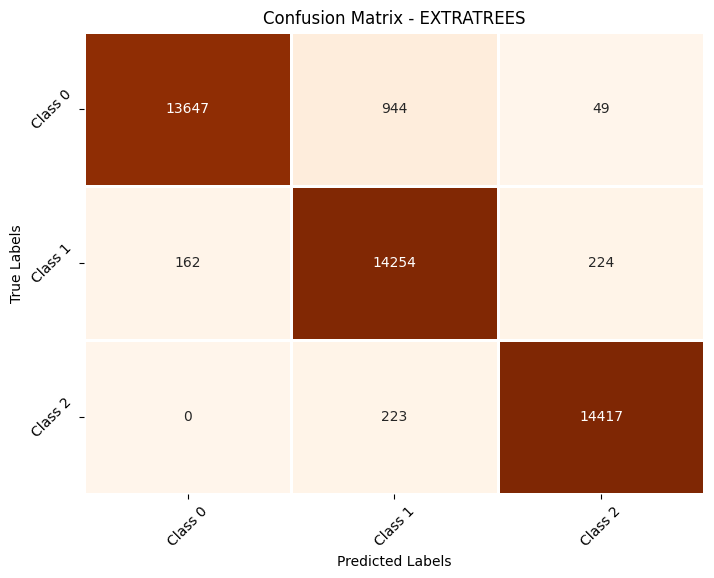

In [38]:
cm = confusion_matrix(y_holdout, y_pred_extra)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", cbar=False, linewidths=1)
plt.title("Confusion Matrix - EXTRATREES")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=["Class 0", "Class 1", "Class 2"], rotation=45)
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=["Class 0", "Class 1", "Class 2"], rotation=45)
plt.show()

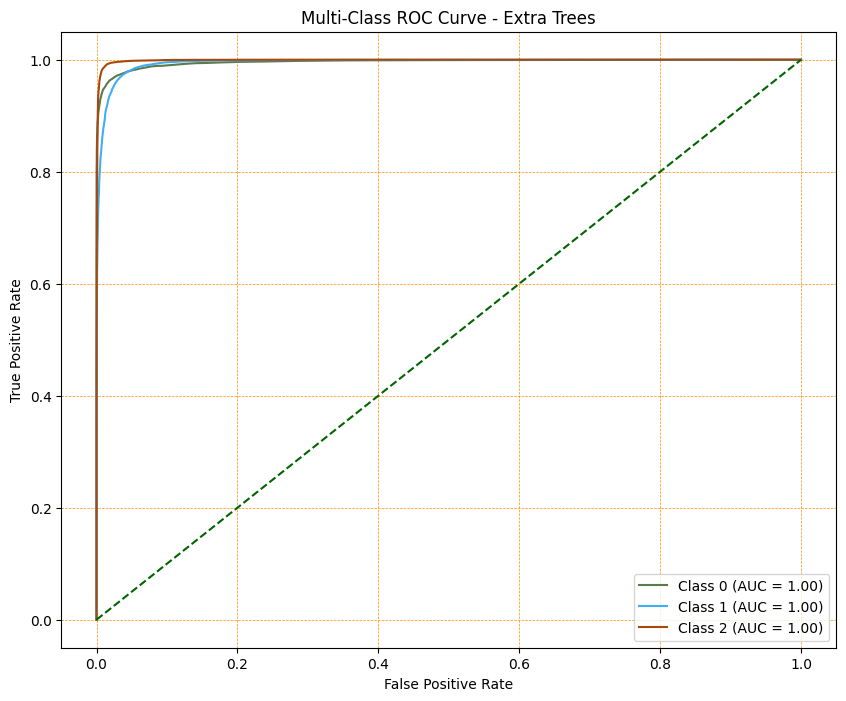

In [ ]:
y_probs = pipe_extratrees.predict_proba(X_holdout) 
n_classes = y_probs.shape[1]
y_holdout_binarized = label_binarize(y_holdout, classes=np.unique(y_holdout))
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_holdout_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {i} (AUC = {roc_auc:.2f})", color=np.random.rand(3,))  
plt.plot([0, 1], [0, 1], color='darkgreen', linestyle='--')
plt.title("Multi-Class ROC Curve - Extra Trees")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(color='darkorange', linestyle='--', linewidth=0.5)
plt.show()

In [40]:
# Combine the pipelines using ENSEMBLE VOTING
pipe_LightGBM 
pipe_grad_boost
pipe_extratrees

Pipeline(steps=[('scaler', StandardScaler()),
                ('extratrees', ExtraTreesClassifier(random_state=42))])

## SOFT VOTING

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003715 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2856
[LightGBM] [Info] Number of data points in the train set: 68318, number of used features: 12
[LightGBM] [Info] Start training from score -1.098598
[LightGBM] [Info] Start training from score -1.098598
[LightGBM] [Info] Start training from score -1.098642
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003171 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2857
[LightGBM] [Info] Number of data points in the train set: 68318, number of used features: 12
[LightGBM] [Info] Start training from score -1.098598
[LightGBM] [Info] Start training from score -1.098642
[LightGBM] [Info] Start training from score -1.098598
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002486 sec

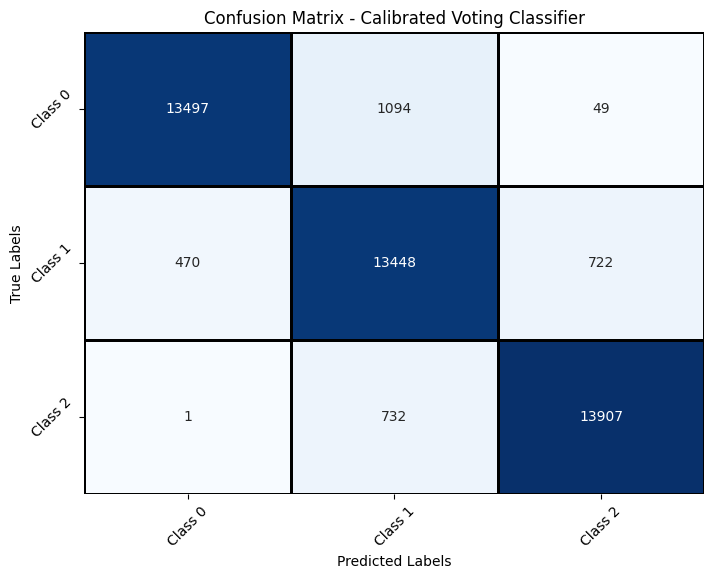

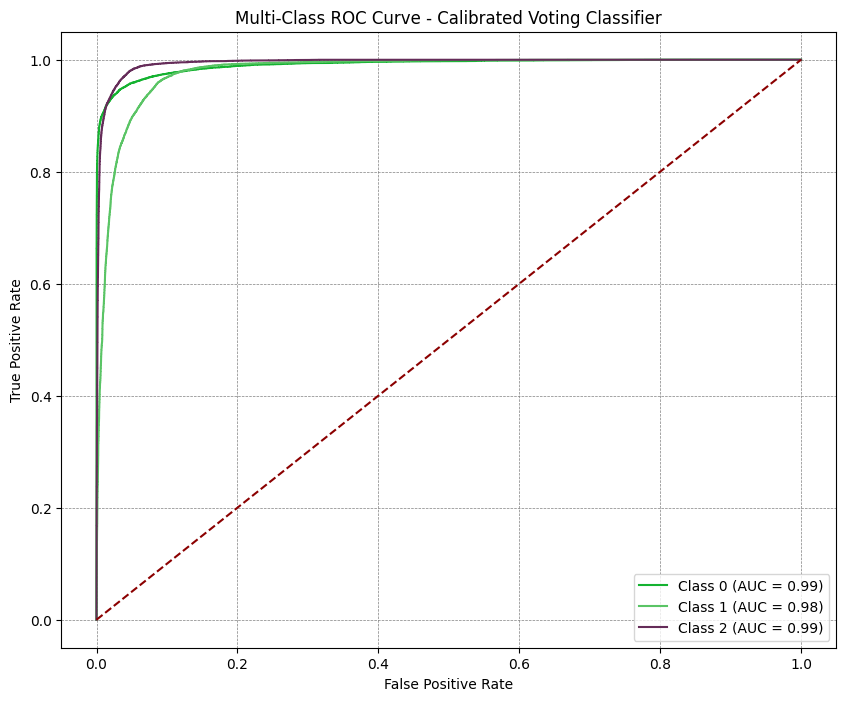

In [53]:
from sklearn.ensemble import VotingClassifier
from sklearn.calibration import CalibratedClassifierCV

# Calibrate individual models without 'prefit'
calibrated_lightgbm = CalibratedClassifierCV(pipe_LightGBM.named_steps['lgbm'], cv=3)
calibrated_grad_boost = CalibratedClassifierCV(pipe_grad_boost.named_steps['grad_boost'], cv=3)
calibrated_extratrees = CalibratedClassifierCV(pipe_extratrees.named_steps['extratrees'], cv=3)

# Fit the calibrated models
calibrated_lightgbm.fit(X_train, y_train)
calibrated_grad_boost.fit(X_train, y_train)
calibrated_extratrees.fit(X_train, y_train)

# Combine calibrated models into a VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('calibrated_lightgbm', calibrated_lightgbm),
    ('calibrated_grad_boost', calibrated_grad_boost),
    ('calibrated_extratrees', calibrated_extratrees)
], voting='soft')

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Accuracy Mean
accuracy_mean = voting_clf.score(X_holdout, y_holdout)
print("Accuracy Mean: ", round(accuracy_mean, 4))

# Classification Report
y_pred = voting_clf.predict(X_holdout)
print("\nClassification Report:")
print(classification_report(y_holdout, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_holdout, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, linewidths=1, linecolor='black')
plt.title("Confusion Matrix - Calibrated Voting Classifier")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(ticks=np.arange(0.5, len(np.unique(y_holdout))), labels=["Class " + str(i) for i in range(len(np.unique(y_holdout)))], rotation=45)
plt.yticks(ticks=np.arange(0.5, len(np.unique(y_holdout))), labels=["Class " + str(i) for i in range(len(np.unique(y_holdout)))], rotation=45)
plt.show()

# ROC Curve
y_probs = voting_clf.predict_proba(X_holdout)
n_classes = y_probs.shape[1]
y_holdout_binarized = label_binarize(y_holdout, classes=np.unique(y_holdout))

plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_holdout_binarized[:, i], y_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label="Class " + str(i) + " (AUC = " + str(round(roc_auc, 2)) + ")", color=np.random.rand(3,))
plt.plot([0, 1], [0, 1], color='darkred', linestyle='--')
plt.title("Multi-Class ROC Curve - Calibrated Voting Classifier")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.show()


In [54]:
# MODEL EXPORT 
import joblib
model_filename = "ensemble_voting_model_fd004.pkl"
joblib.dump(voting_clf, model_filename)

['ensemble_voting_model_fd004.pkl']